<a href="https://colab.research.google.com/github/AshishBhatnagar022/Fruits/blob/master/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from zipfile import ZipFile
files='drive/My Drive/Fruits/fruits.zip'
with ZipFile(files,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
from sklearn.datasets import load_files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img,img_to_array,load_img
from keras.layers import Dense,Activation,MaxPooling2D,Conv2D,Flatten,Dropout
from keras.models import Sequential
import cv2
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
train_dir='fruits-360/Training'
test_dir='fruits-360/Test'
def load_dataset(path):
  data=load_files(path)
  files = np.array(data['filenames'])
  targets = np.array(data['target'])
  target_labels = np.array(data['target_names'])
  
  return files,targets,target_labels

x_train,y_train,target_labels=load_dataset(train_dir)
x_test,y_test,_=load_dataset(test_dir)
print('Loading Complete...')
print('Train',x_train.shape[0])
print('Test',x_test.shape[0])

Loading Complete...
Train 57276
Test 19548


In [0]:
l=100
# plt.imshow(x_train[l])
# x_train.

In [7]:
classes=len(np.unique(y_train))
classes

114

In [8]:
y_train

array([90, 93, 83, ..., 86, 88,  5])

In [0]:
# y_train=to_categorical()
y_train=to_categorical(y_train,classes)
y_test=to_categorical(y_test,classes)



In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def convert_images_to_array(files):
  images_as_array=[]
  for file in files:
    images_as_array.append(img_to_array(load_img(file)))
  return images_as_array
x_train=np.array(convert_images_to_array(x_train))
print(x_train.shape)

(57276, 100, 100, 3)


In [12]:
x_test=np.array(convert_images_to_array(x_test))
print(x_test.shape)

(19548, 100, 100, 3)


In [0]:
x_train=x_train/255
x_test=x_test/255

In [14]:
len(target_labels)

114

Text(0.5, 1.0, 'Tomato Cherry Red')

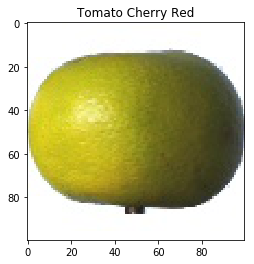

In [15]:
l=110
plt.imshow(x_test[l])
plt.title(target_labels[l])


In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(150))

model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Dense(classes,activation='softmax'))

W0723 20:52:41.298905 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 20:52:41.340005 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 20:52:41.346969 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 20:52:41.375507 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 20:52:41.377960 140159538300800 deprecation_wrapp

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0723 20:53:01.297818 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 20:53:01.321471 140159538300800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.2)

In [19]:
Y_train.shape

(45820, 114)

In [20]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=10,validation_data=(X_test,Y_test))

W0723 20:53:07.260826 140159538300800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45820 samples, validate on 11456 samples
Epoch 1/10
45820/45820 [==============================] - 26s 563us/step - loss: 1.5230 - acc: 0.5977 - val_loss: 0.2522 - val_acc: 0.9355
Epoch 2/10
45820/45820 [==============================] - 19s 415us/step - loss: 0.2269 - acc: 0.9242 - val_loss: 0.0375 - val_acc: 0.9944
Epoch 3/10
45820/45820 [==============================] - 19s 415us/step - loss: 0.1212 - acc: 0.9593 - val_loss: 0.0407 - val_acc: 0.9900
Epoch 4/10
45820/45820 [==============================] - 19s 415us/step - loss: 0.0875 - acc: 0.9708 - val_loss: 0.0156 - val_acc: 0.9974
Epoch 5/10
45820/45820 [==============================] - 19s 417us/step - loss: 0.0727 - acc: 0.9758 - val_loss: 0.0143 - val_acc: 0.9961
Epoch 6/10
45820/45820 [==============================] - 19s 417us/step - loss: 0.0671 - acc: 0.9772 - val_loss: 0.0082 - val_acc: 0.9985
Epoch 7/10
45820/45820 [==============================] - 19s 418us/step - loss: 0.0517 - acc: 0.9833 - val_loss: 0.

In [21]:
loss,acc=model.evaluate(x_test,y_test,batch_size=64)
print('loss',loss)
print('accuracy',acc)

19548/19548 [==============================] - 3s 148us/step
loss 0.06635980181564091
accuracy 0.9788725189277675


In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

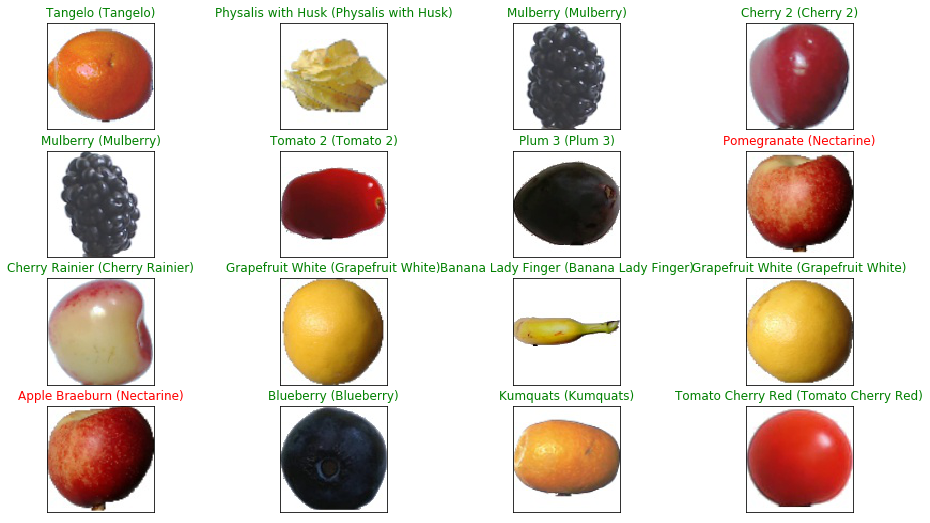

In [25]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))